# Tensor

In [1]:
import torch

In [2]:
x = torch.Tensor(5, 3)   # 构建5x3矩阵,只是分配了空间,未初始化
x

tensor([[1.3848e-14, 6.8801e+16, 1.8370e+25],
        [1.4603e-19, 6.8794e+11, 2.7253e+20],
        [3.0866e+29, 1.1824e+22, 7.0976e+22],
        [1.8515e+28, 4.1988e+07, 3.0357e+32],
        [7.7491e+26, 3.0357e+32, 6.3828e+28]])

In [3]:
x = torch.rand(5, 3)   # 使用[0, 1] 均匀分布随机初始化二维数组
x

tensor([[0.5355, 0.4257, 0.6816],
        [0.3554, 0.3320, 0.5690],
        [0.6869, 0.5243, 0.4264],
        [0.0916, 0.1820, 0.0732],
        [0.1311, 0.7038, 0.6287]])

In [4]:
x.size()

torch.Size([5, 3])

In [5]:
x.size()[0]   # 获取某一维度

5

In [6]:
x.size(0)  # 等价于x.size()[0]

5

In [7]:
y = torch.rand(5, 3)
y

tensor([[0.1611, 0.7458, 0.6197],
        [0.5242, 0.9105, 0.4022],
        [0.0461, 0.0576, 0.7726],
        [0.9084, 0.5765, 0.7548],
        [0.2264, 0.9932, 0.4111]])

In [8]:
# 加法的第一种写法
x + y

tensor([[0.6966, 1.1715, 1.3013],
        [0.8796, 1.2425, 0.9712],
        [0.7330, 0.5819, 1.1990],
        [1.0001, 0.7585, 0.8280],
        [0.3575, 1.6970, 1.0398]])

In [9]:
# 加法的第二种写法
z = torch.add(x, y)
z

tensor([[0.6966, 1.1715, 1.3013],
        [0.8796, 1.2425, 0.9712],
        [0.7330, 0.5819, 1.1990],
        [1.0001, 0.7585, 0.8280],
        [0.3575, 1.6970, 1.0398]])

In [10]:
# 加法的第三种写法
result = torch.Tensor(5, 3)  # 先请求一个和结果一样大小的空间　　然后将结果赋给这个变量
torch.add(x, y, out=result)

tensor([[0.6966, 1.1715, 1.3013],
        [0.8796, 1.2425, 0.9712],
        [0.7330, 0.5819, 1.1990],
        [1.0001, 0.7585, 0.8280],
        [0.3575, 1.6970, 1.0398]])

In [11]:
result

tensor([[0.6966, 1.1715, 1.3013],
        [0.8796, 1.2425, 0.9712],
        [0.7330, 0.5819, 1.1990],
        [1.0001, 0.7585, 0.8280],
        [0.3575, 1.6970, 1.0398]])

In [12]:
# torch 与　numpy 之间的转换
a = torch.ones(5)
type(a)   # torch.Tensor
b = a.numpy()
type(b)   # numpy.ndarray

# 接着将numpy类型的b转换为tensor
c = torch.from_numpy(b)
type(c)   # torch.Tensor

torch.Tensor

In [13]:
# 将变量变为cuda变量   如果没有可以用的cuda则不执行
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    x + y

# Autograd: 自动微分

In [14]:
from torch.autograd import Variable

In [15]:
x = Variable(torch.ones(2, 2), requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [16]:
y = x.sum()   # 将x中的所有变量累加起来
y

tensor(4., grad_fn=<SumBackward0>)

In [17]:
y.grad_fn

In [18]:
y.backward()  # 反向传播 计算梯度

In [19]:
x.grad

tensor([[1., 1.],
        [1., 1.]])

In [20]:
# 梯度是累加的  如果当前梯度不清除的话 则累加到下一步
y.backward()
x.grad

tensor([[2., 2.],
        [2., 2.]])

In [21]:
# 以下划线结束的函数是inplace操作
x.grad.data.zero_()   # 也就是梯度归零

tensor([[0., 0.],
        [0., 0.]])

In [22]:
# Variable和Tensor具有近乎一致的接口，在使用可以无缝切换
x = Variable(torch.ones(4, 5))
# x 和　x.data等价

# y = torch.cos(x)
# type(y)
# x_tensor_cos = torch.cos(x.data)


In [23]:
# 简单写个神经网络
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        # nn.Module子类的函数必须在构造函数中执行父类的构造函数
        # 下式等价于nn.Module.__init__(self)
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)  # 输入１通道　输出6通道　5x5的卷积核
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        # 卷积　－> 激活　-> 池化
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))  # 卷积　激活　2x2的池化
        
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)  # 同样的操作
        
        x = x.view(x.size()[0], -1)  # 相当于压平
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [24]:
# 打印训练参数的个数
params = list(net.parameters())
print(len(params))

10


In [25]:
# 打印训练参数
for name, parameters in net.named_parameters():
    print(name, ':', parameters.size())

conv1.weight : torch.Size([6, 1, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


In [26]:
# 随意构造一个变量 然后输入到网络中
input = Variable(torch.randn(1, 1, 32, 32))  # (batch_size, channel, width height)
out = net(input)
out.size()   # 输出维度

torch.Size([1, 10])

In [27]:
net.zero_grad()  # 所有梯度清零
out.backward(Variable(torch.ones(1, 10)))  # 反向传播

In [28]:
# 构造一些标签
import numpy as np
output = net(input)
data = np.arange(0, 10).astype('float32')
target = torch.from_numpy(data)
# target = Variable(torch.arange(0, 10))
criterion = nn.MSELoss()
loss = criterion(output, target)
print(loss)

tensor(28.6284, grad_fn=<MseLossBackward>)


/home/shawroad/anaconda3/lib/python3.6/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([1, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [29]:
net.zero_grad()  # 把net中所有可以学习参数的梯度清零
print(net.conv1.bias.grad)  # 梯度清零

tensor([0., 0., 0., 0., 0., 0.])


In [30]:
net.zero_grad()
loss.backward()
print(net.conv1.bias.grad)  # 重新反向传播 得到梯度

tensor([ 0.0677, -0.0110, -0.0315,  0.1727, -0.0046, -0.1433])


In [31]:
# 优化器 在计算到所有梯度以后 还要更新参数
learning_rate = 0.001
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)   # 记住用inplace  因为这里我们需要替代之前的参数

In [32]:
# 其实上面的代码并不需要我们去实现，可以用内部的优化函数
import torch.optim as optim

# 新建一个优化器　指定要调整的参数和学习率
optimizer = optim.SGD(net.parameters(), lr=0.001)  # 和上面的代码等价

# 在训练过程中 先梯度清零(与net.zero_grad()效果一样)
optimizer.zero_grad()

# 计算损失
output = net(input)
loss = criterion(output, target)

# 反向传播
loss.backward()

# 更新参数
optimizer.step()

/home/shawroad/anaconda3/lib/python3.6/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([1, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


# 自己实现一个mnist数据集的识别

In [14]:
from keras.datasets import mnist
from keras.utils import to_categorical
from torch.utils.data.dataset import Dataset
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.autograd import Variable


# 模型
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)    # 28-5+1 = 24
        self.conv2 = nn.Conv2d(6, 16, 5)   # 上一步还进行的池化 12   12-5+1=8
        self.fc1 = nn.Linear(16*4*4, 120)  # 上一步再进行池化  4  应该是16x4x4
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = x.view(x.size()[0], -1)  # 将数据压直
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# 写一个继承类 将数据整理成一个很好的样子  然后放进DataLoader()中去
class DataTxt(Dataset):
    def __init__(self):
        self.Data = x_train
        self.Labels = y_train

    def __getitem__(self, item):
        data = torch.from_numpy(self.Data[item])
        label = torch.from_numpy(self.Labels[item])
        return data, label

    def __len__(self):
        return self.Data.shape[0]

import numpy as np
if __name__ == '__main__':
    # 我们加载keras中的内置数据集
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    x_train = x_train.reshape((-1, 1, 28, 28)) / 255.
    x_train = x_train.astype(np.float32)
    x_test = x_test.reshape((-1, 1, 28, 28)) / 255.
    x_test = x_test.astype(np.float32)

    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    dxt = DataTxt()
    trainloader = torch.utils.data.DataLoader(
        dxt,
        batch_size=128,
        shuffle=True,
    )

    dataiter = iter(trainloader)
    # images, labels = dataiter.next()
    # print(images)
    # print(labels)

    net = Net()
    criterion = nn.MultiLabelSoftMarginLoss()  # 多标签损失函数
#     criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

    for epoch in range(10):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # 输入数据
            inputs, labels = data
            # print(inputs.size())   # torch.Size([32, 1, 28, 28])
            # print(labels.size())   # torch.Size([32, 10])

            inputs, labels = Variable(inputs), Variable(labels)

            # 梯度清零
            optimizer.zero_grad()

            # forward + backward
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()

            # 更新参数
            optimizer.step()

            # 打印log信息
            # running_loss += loss.data[0]
            print('epoch: %d, step: %d, loss: %f' % (epoch, i, loss))

epoch: 0, step: 0, loss: 0.683704
epoch: 0, step: 1, loss: 0.683486
epoch: 0, step: 2, loss: 0.683282
epoch: 0, step: 3, loss: 0.683737
epoch: 0, step: 4, loss: 0.683934
epoch: 0, step: 5, loss: 0.683115
epoch: 0, step: 6, loss: 0.683419
epoch: 0, step: 7, loss: 0.682939
epoch: 0, step: 8, loss: 0.682691
epoch: 0, step: 9, loss: 0.683865
epoch: 0, step: 10, loss: 0.682210
epoch: 0, step: 11, loss: 0.681745
epoch: 0, step: 12, loss: 0.681175
epoch: 0, step: 13, loss: 0.681881
epoch: 0, step: 14, loss: 0.680577
epoch: 0, step: 15, loss: 0.679902
epoch: 0, step: 16, loss: 0.681562
epoch: 0, step: 17, loss: 0.680476
epoch: 0, step: 18, loss: 0.679558
epoch: 0, step: 19, loss: 0.680006
epoch: 0, step: 20, loss: 0.679498
epoch: 0, step: 21, loss: 0.679533
epoch: 0, step: 22, loss: 0.679480
epoch: 0, step: 23, loss: 0.678661
epoch: 0, step: 24, loss: 0.679346
epoch: 0, step: 25, loss: 0.678836
epoch: 0, step: 26, loss: 0.678476
epoch: 0, step: 27, loss: 0.677261
epoch: 0, step: 28, loss: 0.67

epoch: 0, step: 239, loss: 0.575082
epoch: 0, step: 240, loss: 0.576079
epoch: 0, step: 241, loss: 0.573254
epoch: 0, step: 242, loss: 0.570443
epoch: 0, step: 243, loss: 0.570480
epoch: 0, step: 244, loss: 0.570579
epoch: 0, step: 245, loss: 0.565059
epoch: 0, step: 246, loss: 0.566401
epoch: 0, step: 247, loss: 0.565913
epoch: 0, step: 248, loss: 0.563165
epoch: 0, step: 249, loss: 0.562759
epoch: 0, step: 250, loss: 0.562339
epoch: 0, step: 251, loss: 0.560796
epoch: 0, step: 252, loss: 0.557957
epoch: 0, step: 253, loss: 0.555712
epoch: 0, step: 254, loss: 0.554007
epoch: 0, step: 255, loss: 0.555883
epoch: 0, step: 256, loss: 0.547994
epoch: 0, step: 257, loss: 0.552487
epoch: 0, step: 258, loss: 0.549453
epoch: 0, step: 259, loss: 0.542942
epoch: 0, step: 260, loss: 0.544965
epoch: 0, step: 261, loss: 0.546644
epoch: 0, step: 262, loss: 0.543283
epoch: 0, step: 263, loss: 0.539840
epoch: 0, step: 264, loss: 0.537220
epoch: 0, step: 265, loss: 0.535415
epoch: 0, step: 266, loss: 0

KeyboardInterrupt: 

# Tensor详解

In [34]:
import torch

In [35]:
# 指定形状的tensor 也就是说明要占多大的空间
a = torch.Tensor(2, 3)
a

tensor([[0.0000e+00, 0.0000e+00, 9.8091e-45],
        [       nan, 3.0340e+21, 3.0652e-41]])

In [36]:
# 可以将一个列表传给tensor
data = [[1, 3, 5], [2, 4, 6]]
data_tensor = torch.Tensor(data)
data_tensor

tensor([[1., 3., 5.],
        [2., 4., 6.]])

In [37]:
# 将tensor直接转为list
data_tensor.tolist()

[[1.0, 3.0, 5.0], [2.0, 4.0, 6.0]]

In [38]:
# 计算tensor中所有元素个数
data_tensor.numel()

6

In [39]:
# 创建一个和data_tensor规格一样的tensor 
copy_data = torch.Tensor(data_tensor.size())
# 创建一个含有2, 3 元素的tensor
include_tensor = torch.Tensor((2, 3))
copy_data
include_tensor

tensor([2., 3.])

In [40]:
# 生成一个规格为(2, 3) 全1的tensor
d_tensor = torch.ones(2, 3)
d_tensor

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [41]:
# 长度为5的随机排列
torch.randperm(5)

tensor([3, 0, 2, 1, 4])

In [42]:
# 生成对角线为１ 这里不要求行数和列数一致
torch.eye(3, 4)

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]])

In [43]:
# 常用tensor操作
a = torch.arange(0, 6)
a.view(2, 3)

tensor([[0, 1, 2],
        [3, 4, 5]])

In [44]:
b = a.view(-1, 3)   # 和上面的a.view(2, 3) 等价
b

tensor([[0, 1, 2],
        [3, 4, 5]])

In [45]:
# 在第1维上加一维
b.unsqueeze(1)

tensor([[[0, 1, 2]],

        [[3, 4, 5]]])

In [46]:
b.unsqueeze(-2)  # 在倒数第二维 也就是正数第二维

tensor([[[0, 1, 2]],

        [[3, 4, 5]]])

In [47]:
c = b.view(1, 1, 1, 2, 3)
c

tensor([[[[[0, 1, 2],
           [3, 4, 5]]]]])

In [48]:
# 压缩第0维的1
c = c.squeeze(0)
c.size()

torch.Size([1, 1, 2, 3])

In [49]:
c.squeeze().size()  # 把所有维度为1的维度压没

torch.Size([2, 3])

In [50]:
# resize是一种可以调整size的方法，但与view()不同，他是可以修改tensor的尺寸
a = torch.arange(12).view(3, 4)
a

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [51]:
a.resize_(3, 5)  #　会根据数据调整尺寸　　不够的补充，多余的扔掉

tensor([[             0,              1,              2,              3,
                      4],
        [             5,              6,              7,              8,
                      9],
        [            10,             11, 93949820250032, 93949820250072,
                      1]])

In [52]:
a.resize_(3, 2)

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [53]:
# 索引操作
a = torch.randn(3, 5)
a

tensor([[ 1.5544,  0.2353,  0.2304, -1.2781,  0.1297],
        [-0.3615,  0.2311, -0.8747, -0.4002, -0.5390],
        [-0.9080, -0.2163,  2.2745,  0.6223, -0.7878]])

In [54]:
a[0]

tensor([ 1.5544,  0.2353,  0.2304, -1.2781,  0.1297])

In [55]:
a[0:2, 1:3]

tensor([[ 0.2353,  0.2304],
        [ 0.2311, -0.8747]])

In [56]:
a > 1  # 大于１置为True, 下于1置为False

tensor([[ True, False, False, False, False],
        [False, False, False, False, False],
        [False, False,  True, False, False]])

In [57]:
# gather()的用法
a = torch.arange(0, 16).view(4, 4)
a

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

In [58]:
index = torch.LongTensor([[0, 1, 2, 3]])
a.gather(0, index)

tensor([[ 0,  5, 10, 15]])

In [59]:
# 选取反对角线的元素
index = torch.LongTensor([[3, 2, 1, 0]]).t()
a.gather(1, index)

tensor([[ 3],
        [ 6],
        [ 9],
        [12]])

In [60]:
# 设置全局tensor的类型
torch.set_default_tensor_type('torch.FloatTensor')   # 仅仅能全局指定FloatTensor

In [61]:
a = torch.Tensor(3, 3)  # 默认为FloatTensor
# 将FloatTensor转为IntTensor
b = a.int() 

In [64]:
# 将逐元素进行操作
a = np.arange(0, 6).reshape((2, 3)).astype(np.float32)
a = torch.from_numpy(a)
# a = torch.arange(0, 6).view(2, 3)
torch.cos(a)

tensor([[ 1.0000,  0.5403, -0.4161],
        [-0.9900, -0.6536,  0.2837]])

In [65]:
# clamp函数的使用
a = np.arange(0, 6).reshape((2, 3))
a

array([[0, 1, 2],
       [3, 4, 5]])

In [66]:
a = torch.from_numpy(a)
b = torch.clamp(a, min=3)
b

tensor([[3, 3, 3],
        [3, 4, 5]])

In [67]:
# 归并操作
b = torch.ones(2, 3)
b.sum(dim=0, keepdim=True)

tensor([[2., 2., 2.]])

In [68]:
# 归并操作
b = torch.ones(2, 3)
b.sum(dim=1, keepdim=True)

tensor([[3.],
        [3.]])

In [70]:
# 沿着行累加
a = torch.arange(0, 6).view(2, 3)
a

tensor([[0, 1, 2],
        [3, 4, 5]])

In [71]:
a.cumsum(dim=1)

tensor([[ 0,  1,  3],
        [ 3,  7, 12]])

In [72]:
a = torch.linspace(0, 16, 6).view(2, 3)  # 0到16 产生6个数
a

tensor([[ 0.0000,  3.2000,  6.4000],
        [ 9.6000, 12.8000, 16.0000]])

In [73]:
a.max()

tensor(16.)

In [74]:
# 线性代数中的一些函数
b = a.t()  # a的转置
b

tensor([[ 0.0000,  9.6000],
        [ 3.2000, 12.8000],
        [ 6.4000, 16.0000]])

In [75]:
# tensor分为头信息区(Tensor)和存储区(storage)  信息区存的就是数据的形状，步长等等，　存储区存的就是数据
a = torch.arange(0, 6)
a.storage()

 0
 1
 2
 3
 4
 5
[torch.LongStorage of size 6]

In [76]:
b = a.view(2, 3)
b.storage()

 0
 1
 2
 3
 4
 5
[torch.LongStorage of size 6]

In [78]:
id(b.storage()) == id(a.storage())   # 说明a　和　b指的是同一批数据　只是信息区不太一样

True

In [79]:
b[0, 0] = 100
b

tensor([[100,   1,   2],
        [  3,   4,   5]])

In [81]:
a  # 可以发现b中的数据更改　　a中的数据也进行更改

tensor([100,   1,   2,   3,   4,   5])

In [82]:
a.is_contiguous()

True

In [83]:
b.is_contiguous()

True

In [85]:
b = b.contiguous()

In [87]:
b[0, 1] = 200
b

tensor([[100, 200,   2],
        [  3,   4,   5]])

In [88]:
a

tensor([100, 200,   2,   3,   4,   5])

In [90]:
# 保存tensor到某个文件中
if torch.cuda.is_available():
    a = a.cuda(1)  # 把tensor放到cuda1上去
    torch.save(a, 'a.pth')
    
    # 加载a 存储在GPU1上去
    b = torch.load('a.pth')
    
    # 加载a 存在cpu
    c = torch.load('a.pth', map_location=lambda storage, loc: storage)
    
    # 加载a 存储在gpu0上
    d = torch.load('a.pth', map_location={'cuda:1': 'cuda:0'})

In [97]:
# expand()和expand_as()的用法  一个传入的是size  一个传入的是tensor   两个函数都是通过一个tensor扩充成另外一个tensor
x = torch.tensor([[1], [2], [3]])
print('xsize:',x.size())  #  (3, 1)
print('x:',x)
 
x_expand=x.expand(3,4)   # (3, 4)
print('x_expand:',x_expand)
 
x_expand=x.expand(-1,4)  # -1 means not changing the size of that dimension
print('x_expand:',x_expand)   # 跟上面的作用是一样的
 
x_expand_as=x.expand_as(x_expand)   # expand_as()传进来一个tensor　生成跟他一摸一样的tensor
print('x_expand_as:',x_expand_as)

xsize: torch.Size([3, 1])
x: tensor([[1],
        [2],
        [3]])
x_expand: tensor([[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]])
x_expand: tensor([[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]])
x_expand_as: tensor([[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]])


# 线性回归的小实践

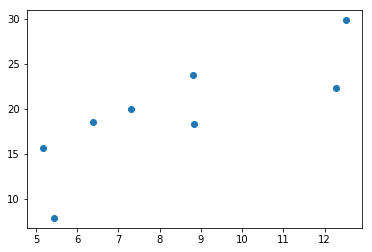

In [92]:
import torch
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display

torch.manual_seed(1000)  # 设置随机种子　保证在不同计算机上运行时的输出是一致的

def get_fake_data(batch_size=8):
    '''
    产生随机数据: y = x*2 + 3, 加上了一些噪声
    '''
    x = torch.rand(batch_size, 1) * 20
    y = x * 2 + (1 + torch.randn(batch_size, 1)) * 3  # x*2 加噪声
    return x, y

x, y = get_fake_data()
plt.scatter(x.squeeze().numpy(), y.squeeze().numpy())

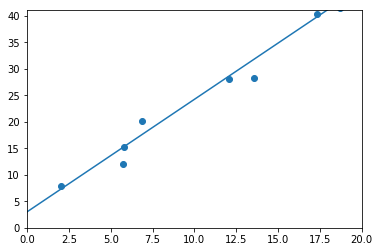

tensor(2.1222) tensor(2.9956)


In [104]:
# 随机化参数
w = torch.rand(1, 1)
b = torch.zeros(1, 1)
lr = 0.001  # 学习率
for ii in range(20000):
    x, y = get_fake_data()
    
    # forward: 计算loss
    y_pred = x.mm(w) + b.expand_as(y)  # 用ｂ的数据扩充成和ｙ规格一样的tensor
    loss = 0.5 * (y_pred - y) ** 2  # 均方误差
    loss = loss.sum()
    
    # backward: 手动计算梯度
    dloss = 1
    dy_pred = dloss * (y_pred - y)
    
    dw = x.t().mm(dy_pred)
    db = dy_pred.sum()
    
    # 更新参数
    w.sub_(lr * dw)
    b.sub_(lr * db)
    
    if ii % 1000 == 0:
        # 画图
        display.clear_output(wait=True)
        x = np.arange(0, 20).reshape((-1, 1))
        x = torch.Tensor(x)
        # x = torch.arange(0, 20).view(-1, 1)
        y = x.mm(w) + b.expand_as(x)
        plt.plot(x.numpy(), y.numpy())
        
        x2, y2 = get_fake_data()
        plt.scatter(x2.numpy(), y2.numpy())
        
        plt.xlim(0, 20)
        plt.ylim(0, 41)
        plt.show()
        plt.pause(0.5)
        print(w.squeeze(), b.squeeze())

# autograd详解

In [105]:
import torch
from torch.autograd import Variable

In [106]:
# 从tensor中创建variable, 指定需要求导
a = Variable(torch.ones(3, 4), requires_grad=True)
a

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], requires_grad=True)

In [107]:
b = Variable(torch.zeros(3, 4))
b

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [109]:
c = a + b
c

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]], grad_fn=<AddBackward0>)

In [110]:
d = c.sum()
d.backward() # 反向传播

In [115]:
# 注意以下两者的区别
print(c.data.sum())  # 去data后变为tensor,从tensor计算sum得到float值
print(c.sum())  #　直接计算sum后 仍然为Variable

tensor(12.)
tensor(12., grad_fn=<SumBackward0>)


In [116]:
a.grad

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [118]:
# 此处虽然没有指定c需要求导，但是c依赖与a　而a需求导
# 因此c的requires_grad属性默认自动设置为True
a.requires_grad, b.requires_grad, c.requires_grad   # 可以发现定义b变量时，没有指定requires_grad为True 所以他不进行求导

(True, False, True)

In [119]:
# 由用户创建的Variable属于叶子节点, 对应的grad_fn是None
a.is_leaf, b.is_leaf, c.is_leaf

(True, True, False)

In [120]:
# c.grad是None , c不是叶子节点，他的梯度是用来计算a的梯度的。虽然c.requires_grad是True，　但是梯度计算完成后就会被释放掉
c.grad is None

True

# 真正体验反向传播

In [126]:
# 真正体验反向传播
def f(x):
    '''
    计算y
    '''
    y = x ** 2 * torch.exp(x)
    return y

def gradf(x):
    '''
    上面函数的导数 为了反向传播
    '''
    dx = 2 * x * torch.exp(x) + x ** 2 * torch.exp(x)
    return dx

In [127]:
x = Variable(torch.randn(3, 4), requires_grad=True)
y = f(x)
y

tensor([[3.0533e-01, 3.5055e-03, 2.0568e-01, 9.3676e+00],
        [2.9764e-01, 1.6310e+00, 2.2287e+00, 4.9269e-01],
        [8.4501e+01, 5.6158e-02, 1.4492e-01, 9.3108e-01]],
       grad_fn=<MulBackward0>)

In [128]:
y.backward(torch.ones(y.size()))
x.grad

tensor([[-4.2018e-01, -1.1135e-01,  1.3002e+00,  2.2125e+01],
        [-4.2522e-01,  5.5172e+00,  6.9947e+00, -1.8813e-01],
        [ 1.5056e+02,  5.8338e-01, -4.5244e-01,  3.6493e+00]])

In [129]:
gradf(x)

tensor([[-4.2018e-01, -1.1135e-01,  1.3002e+00,  2.2125e+01],
        [-4.2522e-01,  5.5172e+00,  6.9947e+00, -1.8813e-01],
        [ 1.5056e+02,  5.8338e-01, -4.5244e-01,  3.6493e+00]],
       grad_fn=<AddBackward0>)

In [130]:
def abs(x):
    if x.data[0] > 0:
        return x
    else:
        return -x
x = Variable(torch.ones(1), requires_grad=True)
y = abs(x)
y.backward()
x.grad

tensor([1.])

In [131]:
x = Variable(-1 * torch.ones(1), requires_grad=True)
y = abs(x)
y.backward()
x.grad

tensor([-1.])

In [133]:
# 第一种方法：使用grad获取中间变量的梯度
x = Variable(torch.ones(3), requires_grad=True)
w = Variable(torch.rand(3), requires_grad=True)
y = x * w
z = y.sum()
torch.autograd.grad(z, y)   # z对y的导数

(tensor([1., 1., 1.]),)

In [134]:
# 扩展的autograd
# 绝大多数函数都可以使用autograd实现反向求导，但如果需要自己写一个复杂函数，不支持自动反向求导 我们让其方向求导
from torch.autograd import Function
class Mul(Function):
    
    @staticmethod
    def forward(ctx, w, x, b, x_requires_grad=True):
        ctx.x_requires_grad = x_requires_grad
        ctx.save_for_backward(w, x)
        output = w * x + b
        return output
    
    @staticmethod
    def backward(ctx, grad_output):
        w, x = ctx.saved_variables
        grad_w = grad_output * x
        if ctx.x_requires_grad:
            grad_x = grad_output * w
        else:
            grad_x = None
        grad_b = grad_output * 1
        return grad_w, grad_x, grad_b, None

In [136]:
# 下面才是一个真正的例子
from torch.autograd import Function
class MultiplyAdd(Function):
    
    @staticmethod
    def forward(ctx, w, x, b):
        print('type in forward', type(x))
        ctx.save_for_backward(w, x)
        output = w * x + b
        return output
    
    @staticmethod
    def backward(ctx, grad_output):
        w, x = ctx.saved_variables
        print("type in backward", type(x))
        grad_w = grad_output * x
        grad_x = grad_output * w
        grad_b = grad_output * 1
        return grad_w, grad_x, grad_b

In [138]:
x = Variable(torch.ones(1))
w = Variable(torch.rand(1), requires_grad=True)
b = Variable(torch.rand(1), requires_grad=True)
print("开始前向传播")
z = MultiplyAdd.apply(w, x, b)
print("开始反向传播")
z.backward()

x.grad, w.grad, b.grad

开始前向传播
type in forward <class 'torch.Tensor'>
开始反向传播
type in backward <class 'torch.Tensor'>


/home/shawroad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: 'saved_variables' is deprecated; use 'saved_tensors'
  


(None, tensor([1.]), tensor([1.]))

# 用Variable实现一个线性回归

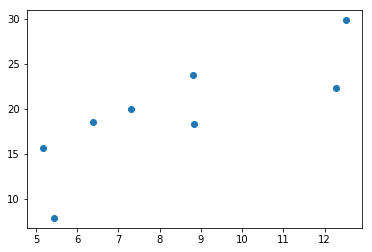

In [139]:
import torch
from torch.autograd import Variable
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display

torch.manual_seed(1000)  # 设置随机种子　保证在不同计算机上运行时的输出是一致的

def get_fake_data(batch_size=8):
    '''
    产生随机数据: y = x*2 + 3, 加上了一些噪声
    '''
    x = torch.rand(batch_size, 1) * 20
    y = x * 2 + (1 + torch.randn(batch_size, 1)) * 3  # x*2 加噪声
    return x, y

x, y = get_fake_data()
plt.scatter(x.squeeze().numpy(), y.squeeze().numpy())

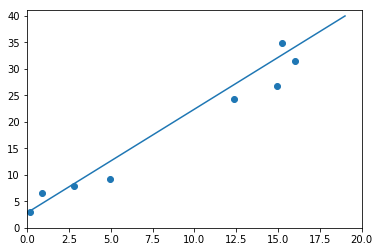

tensor(1.9537, grad_fn=<SqueezeBackward0>) tensor(2.8243, grad_fn=<SqueezeBackward0>)


In [146]:
w = Variable(torch.rand(1, 1), requires_grad=True)
b = Variable(torch.zeros(1, 1), requires_grad=True)

lr = 0.001  # 学习率
for ii in range(8000):
    x, y = get_fake_data()
    x, y = Variable(x), Variable(y)
    
    # 前向传播 计算loss
    y_pred = x.mm(w) + b.expand_as(y)
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()
    
    # 反向传播 自动计算梯度
    loss.backward()
    
    # 更新参数
    w.data.sub_(lr * w.grad.data)
    b.data.sub_(lr * b.grad.data)
    
    # 梯度清零
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    if ii % 1000 == 0:
        # 画图
        display.clear_output(wait=True)
        x = np.arange(0, 20).reshape((-1, 1))
        x = torch.Tensor(x)
        # x = torch.arange(0, 20).view(-1, 1)
        y = x.mm(w) + b.expand_as(x)
        plt.plot(x.data.numpy(), y.data.numpy())
        
        x2, y2 = get_fake_data()
        plt.scatter(x2.numpy(), y2.numpy())
        
        plt.xlim(0, 20)
        plt.ylim(0, 41)
        plt.show()
        plt.pause(0.5)
        print(w.squeeze(), b.squeeze())
    

# 神经网络工具箱nn

In [160]:
import torch
from torch import nn
from torch.autograd import Variable

class Linear(nn.Module):
    def __init__(self, in_features, out_features):
        super(Linear, self).__init__()
        self.w = nn.Parameter(torch.randn(in_features, out_features))
        self.b = nn.Parameter(torch.randn(out_features))
    
    def forward(self, x):
        x = x.mm(self.w)
        return x + self.b.expand_as(x)

In [162]:
layer = Linear(4, 3)
input = Variable(torch.randn(2, 4))
output = layer(input)
output

tensor([[-1.2005,  1.3777, -0.1111],
        [ 0.2759, -0.3181,  1.5468]], grad_fn=<AddBackward0>)

In [163]:
for name, parameter in layer.named_parameters():
    print(name, parameter)

w Parameter containing:
tensor([[ 0.6306, -0.7847,  0.1394],
        [-0.5169, -0.4820, -1.1159],
        [-0.9626,  0.3941, -0.3238],
        [ 0.3742, -0.2633, -1.2027]], requires_grad=True)
b Parameter containing:
tensor([-0.9069,  0.3675, -0.0105], requires_grad=True)


In [164]:
# 用我们上面定义的线性网络结构 构建一个感知机
class Perception(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        super(Perception, self).__init__()
        # 用的是我们前面定义的网络结构
        self.layer1 = Linear(in_features, hidden_features)
        self.layer2 = Linear(hidden_features, out_features)
    
    def forward(self, x):
        x = self.layer1(x)
        x = torch.sigmoid(x)  # 加个激活函数
        x = self.layer2(x)
        return x

In [165]:
perception = Perception(3, 4, 1)
for name, param in perception.named_parameters():
    print(name, param)

layer1.w Parameter containing:
tensor([[ 0.5330,  0.7061, -0.8835, -1.1789],
        [ 1.6206,  0.7999,  0.5350,  1.3513],
        [-0.4136, -1.5796,  0.3841, -0.4208]], requires_grad=True)
layer1.b Parameter containing:
tensor([ 0.7125, -0.5406, -0.3815, -0.3339], requires_grad=True)
layer2.w Parameter containing:
tensor([[ 1.7196],
        [-2.1501],
        [ 1.6182],
        [-2.8841]], requires_grad=True)
layer2.b Parameter containing:
tensor([0.4356], requires_grad=True)


# 图像方面的使用 ---卷积神经网络

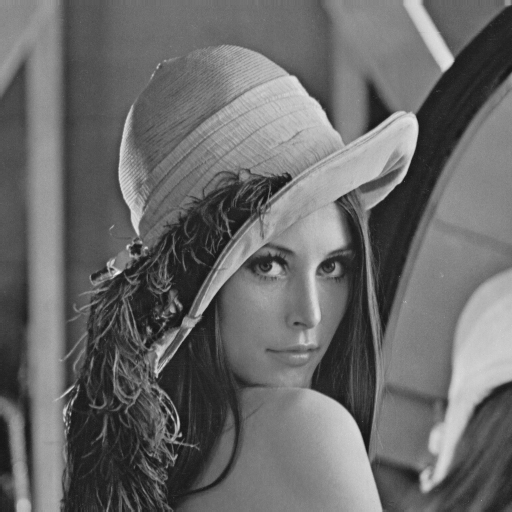

In [169]:
from PIL import Image
from torchvision.transforms import ToTensor, ToPILImage
to_tensor = ToTensor()  # image -> tensor
to_pil = ToPILImage()  # tensor -> image
lena = Image.open('./lena.png')
lena

In [170]:
input = to_tensor(lena).unsqueeze(0)
input

tensor([[[[0.5569, 0.5569, 0.5529,  ..., 0.5882, 0.5294, 0.4235],
          [0.5569, 0.5569, 0.5529,  ..., 0.5922, 0.5255, 0.4235],
          [0.5569, 0.5569, 0.5569,  ..., 0.5843, 0.5333, 0.4235],
          ...,
          [0.1255, 0.1255, 0.1412,  ..., 0.3294, 0.3216, 0.3216],
          [0.1255, 0.1255, 0.1569,  ..., 0.3333, 0.3412, 0.3490],
          [0.1255, 0.1255, 0.1529,  ..., 0.3294, 0.3373, 0.3529]]]])

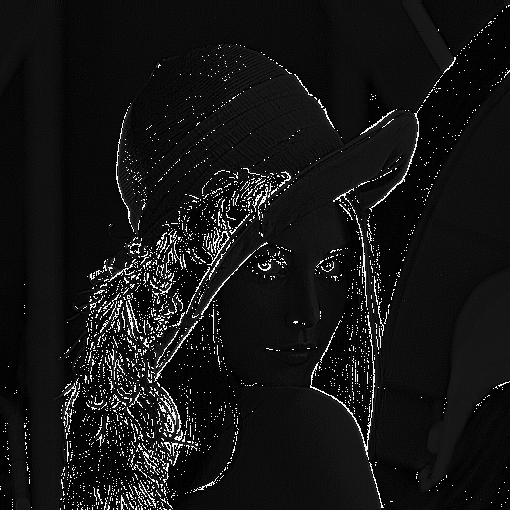

In [172]:
# 锐化卷积核
kernel = torch.ones(3, 3) / -9.
kernel[1][1] = 1
conv = nn.Conv2d(1, 1, (3, 3), 1, bias=False)
conv.weight.data = kernel.view(1, 1, 3, 3)

out = conv(Variable(input))
to_pil(out.data.squeeze(0))  # 把0维度压没

In [173]:
# 在进行池化看看
pool = nn.AvgPool2d(2, 2)   # 图片会缩小一半
list(pool.parameters())

[]

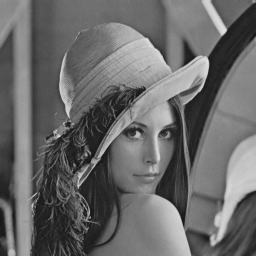

In [174]:
out = pool(Variable(input))
to_pil(out.data.squeeze(0))

In [175]:
# 全连接层
input = Variable(torch.randn(2, 3))
linear = nn.Linear(3, 4)
h = linear(input)
h

tensor([[ 0.0310, -0.6539, -0.8167, -0.3016],
        [ 0.2826, -1.0260, -0.2211, -0.2134]], grad_fn=<AddmmBackward>)

In [178]:
# 批归一化  初始化标准差为4  均值为0
bn = nn.BatchNorm1d(4)
bn.weight.data = torch.ones(4) * 4 
bn.bias.data = torch.zeros(4)  

In [179]:
bn_out = bn(h)
bn_out.mean(0), bn_out.var(0, unbiased=False)

(tensor([0.0000e+00, 7.1526e-07, 0.0000e+00, 0.0000e+00],
        grad_fn=<MeanBackward1>),
 tensor([15.9899, 15.9954, 15.9982, 15.9181], grad_fn=<VarBackward1>))

In [180]:
# dropout
dropout = nn.Dropout(0.5)
do = dropout(bn_out)
do

tensor([[-7.9975,  7.9988, -7.9995, -7.9795],
        [ 7.9975, -7.9988,  7.9995,  7.9795]], grad_fn=<MulBackward0>)

In [187]:
# Sequential的三种写法
# 第一种
net1 = nn.Sequential()
net1.add_module('conv', nn.Conv2d(3, 3, 3))
net1.add_module('batchnorm', nn.BatchNorm2d(3))
net1.add_module('activation_layer', nn.ReLU())

# 第二种
net2 = nn.Sequential(
    nn.Conv2d(3, 3, 3),
    nn.BatchNorm2d(3),
    nn.ReLU()
)

# 第三种
from collections import OrderedDict
net3  = nn.Sequential(OrderedDict([
    ('conv1', nn.Conv2d(3, 3, 3)),
    ('bn1', nn.BatchNorm2d(3)),
    ('relu1', nn.ReLU())
    ]
))
print('net1', net1)
print('net2', net2)
print('net3', net3)

net1 Sequential(
  (conv): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (activation_layer): ReLU()
)
net2 Sequential(
  (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
)
net3 Sequential(
  (conv1): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
)


In [189]:
# 可根据名字或序号取出子Module
net1.conv, net2[0], net3.conv1

(Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1)),
 Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1)),
 Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1)))

In [197]:
# 一堆胡乱的输出
input = Variable(torch.rand(1, 3, 4, 4))
output1 = net1(input)
output2 = net2(input)
output3 = net3(input)
output4 = net3.relu1(net1.batchnorm(net1.conv(input)))
print(output1, output2, output3, output4)

tensor([[[[0.0000, 0.0000],
          [1.7208, 0.0000]],

         [[0.0000, 1.4821],
          [0.0000, 0.1790]],

         [[1.3802, 0.4238],
          [0.0000, 0.0000]]]], grad_fn=<ReluBackward0>) tensor([[[[1.4119, 0.0000],
          [0.0000, 0.3640]],

         [[0.8770, 0.0000],
          [0.1507, 0.6436]],

         [[0.0000, 0.7717],
          [1.1781, 0.0000]]]], grad_fn=<ReluBackward0>) tensor([[[[0.0000, 0.0000],
          [1.4361, 0.0817]],

         [[1.4003, 0.0000],
          [0.0000, 0.2563]],

         [[1.0843, 0.0000],
          [0.8777, 0.0000]]]], grad_fn=<ReluBackward0>) tensor([[[[0.0000, 0.0000],
          [1.7208, 0.0000]],

         [[0.0000, 1.4821],
          [0.0000, 0.1790]],

         [[1.3802, 0.4238],
          [0.0000, 0.0000]]]], grad_fn=<ReluBackward0>)


In [193]:
# 注意ModuleList已经被抛弃
# modellist = nn.ModuleList([nn.Linear(3, 4), nn.ReLU(), nn.Linear(4, 2)])
# input = Variable(torch.randn(1, 3))
# for model in Modellist:
#     input = model(input)
# print(input)

# 文本方面的应用----循环神经网络

In [1]:
import torch
from torch import nn
from torch.autograd import Variable
torch.manual_seed(1000)

In [2]:
# 输入: batch_size=3 序列长度为2， 序列中每个元素的维度为4
input = Variable(torch.randn(2, 3, 4))

# lstm输入向量为4维 3个隐藏单元 1层
lstm = nn.LSTM(4, 3, 1)  

# 初始状态: 1层 batch_size=3  3个隐层单元
h0 = Variable(torch.randn(1, 3, 3))  # 初始化刚开始的隐状态
c0 = Variable(torch.randn(1, 3, 3))  # 相当于那个记忆细胞
out, hn = lstm(input, (h0, c0))   
out

tensor([[[-0.3610, -0.1643,  0.1631],
         [-0.0613, -0.4937, -0.1642],
         [ 0.5080, -0.4175,  0.2502]],

        [[-0.0703, -0.0393, -0.0429],
         [ 0.2085, -0.3005, -0.2686],
         [ 0.1482, -0.4728,  0.1425]]], grad_fn=<StackBackward>)

In [5]:
# 直接调用LSTMCell
torch.manual_seed(1000)
input = Variable(torch.randn(2, 3, 4))
# 一个LSTMCell对应层数只能是一层
lstm = nn.LSTMCell(4, 3)  # 输入4维  每一步的输出为3维 可能只对应我所谓的一步吧
hx = Variable(torch.randn(3, 3))
cx = Variable(torch.randn(3, 3))
out = []
for i_ in input:
    hx, cx = lstm(i_, (hx, cx))
    out.append(hx)
torch.stack(out)

tensor([[[-0.3610, -0.1643,  0.1631],
         [-0.0613, -0.4937, -0.1642],
         [ 0.5080, -0.4175,  0.2502]],

        [[-0.0703, -0.0393, -0.0429],
         [ 0.2085, -0.3005, -0.2686],
         [ 0.1482, -0.4728,  0.1425]]], grad_fn=<StackBackward>)

In [7]:
# Embedding的使用
import numpy as np
data = np.arange(0, 4)
data = torch.from_numpy(data)
embedding = nn.Embedding(4, 5)   # 用4个词， 每个词用5维的向量表示
embedding(data)

tensor([[ 1.1740, -0.0648,  0.1255, -1.2623, -0.6786],
        [ 0.6393,  1.4930, -0.2436, -0.0592, -0.1816],
        [-1.2177,  2.1849, -0.6962,  0.8162,  0.3831],
        [ 0.4780,  0.0822, -0.0416,  1.3979, -0.0186]],
       grad_fn=<EmbeddingBackward>)

In [8]:
# 可以用与训练好的词向量初始化embedding
embedding = nn.Embedding(4, 5)
embedding.weight.data = torch.arange(0, 20).view(4, 5)
input = Variable(torch.arange(3, 0, -1)).long()
output = embedding(input)
output

tensor([[15, 16, 17, 18, 19],
        [10, 11, 12, 13, 14],
        [ 5,  6,  7,  8,  9]], grad_fn=<EmbeddingBackward>)

# 损失函数和优化器

In [16]:
# batch_size = 3  # 计算每个类别的分数　　(只有两个类别)
score = Variable(torch.randn(3, 2))

# 三个样本分别属于１, 0, 1类别　label必须是LongTensor
label = Variable(torch.Tensor([1, 0, 1])).long()  # 将标签转为LongTensor类型

# loss与普通的layer无差异
criterion = nn.CrossEntropyLoss()
loss = criterion(score, label)
loss

# 总结这不代码 我们使用CrossEntropyLoss时, 真实标签不用转为one_hot  但输出标签输出的维度还是标签的个数

tensor(0.7579)

In [24]:
# 优化器
# pytorch将深度学习中常用的优化器全部封装在torch.optim中
# 建立LeNet　并指定不同层的学习率
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 6, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            
            nn.Conv2d(6, 16, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        
        self.classifier = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = x.view(-1, 16 * 5 * 5)
        X = self.classifier(x)
        return x
net = LeNet()
print(net)

LeNet(
  (features): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)


In [22]:
from torch import optim
optimizer = optim.SGD(params=net.parameters(), lr=1)  # 送进去待优化的参数和学习率
optimizer.zero_grad()  # 梯度清零

input = Variable(torch.randn(1, 3, 32, 32))
output = net(input)

# 一般这里还要加个损失函数把  不加就是扯淡

output.backward(output)

optimizer.step()   # 执行优化

In [23]:
# 为不同的子网络设置不同的学习率，　在finetune中经常用到
# 如果对某个参数不指定学习率,就是用的是默认的学习率
optimizer = optim.SGD([
    {'params': net.features.parameters()},   # 使用的是全局的学习率(默认)  1e-5   
    {'params': net.classifier.parameters(), 'lr': 1e-2}    # 使用指定的学习率 1e-2
], lr=1e-5)

In [26]:
# 只为两个全连接层设置较大的学习率  其他层学习率较小
special_layers = nn.ModuleList([net.classifier[0], net.classifier[2]])  # 取出那两个全连接层
special_layers_params = list(map(id, special_layers.parameters()))
base_params = filter(lambda p: id(p) not in special_layers_params, net.parameters())

optimizer = optim.SGD([
    {'params': base_params},
    {'params': special_layers.parameters(), 'lr': 0.01}
], lr=0.001)

nn中还有一个模块 functional。  nn中的大多数layer在functional中都有对应一个与之相对应的函数。 nn.functional中的函数和nn.Module的主要区别在于，用nn.Module实现的layers是一个特殊的类,都是有class Layer(nn.Module)定义, 会自动提取可学习的参数, 而nn.functional中的函数更像是纯函数，有def function(input)定义。。

In [36]:
# 自己对functional的理解: 其实functional也可以实现卷积 全连接　只是要自动手动创建可学习的参数　使用autograd.Variable()去创建
from torch.autograd import Variable
input = Variable(torch.randn(2, 3))
model = nn.Linear(3, 4)
output1 = model(input)
output2 = nn.functional.linear(input, model.weight, model.bias)  # 这里的weight, bias 可以用nn.Parameter去定义　可以用Variable定义 requires_grad=True即可
print(output1)
print(output2)

tensor([[ 0.3978,  0.4246,  0.7730, -0.0808],
        [ 0.1345,  0.2062,  0.4431, -0.1556]], grad_fn=<AddmmBackward>)
tensor([[ 0.3978,  0.4246,  0.7730, -0.0808],
        [ 0.1345,  0.2062,  0.4431, -0.1556]], grad_fn=<AddmmBackward>)


In [37]:
b1 = nn.ReLU()(input)
b2 = nn.functional.relu(input)
print(b1)
print(b2)

tensor([[0.4330, 0.7519, 0.2971],
        [0.0000, 1.0769, 0.3052]])
tensor([[0.4330, 0.7519, 0.2971],
        [0.0000, 1.0769, 0.3052]])


In [38]:
# 使用nn.Module和nn.functional建立一个网络
# 不具备可学习参数的层(激活， 池化等) 将他们用函数代替,这样可以不用放置在构造函数__init__()中
from torch.nn import functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = F.pool(F.relu(self.conv1(x)), 2)
        x = F.pool(F.relu(self.conv2(x)), 2)
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.f3(x)
        return x

In [39]:
#　我们也可以纯用functional去构建网络
class MyLinear(nn.Module):
    def __init__(self):
        super(MyLinear, self).__init__()
        self.weight = nn.Parameter(torch.randn(3, 4))
        self.bias = nn.Parameter(torch.zeros(3))
    def forward(self):
        return F.linear(input, weight, bias)

初始化策略

In [44]:
# 利用nn.init初始化
from torch.nn import init
linear = nn.Linear(3, 4)

torch.manual_seed(1)
# 等价于linear.weight.data.normal_(0, std)
init.xavier_normal(linear.weight)  # 初始化全连接的权重

/home/shawroad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  import sys


Parameter containing:
tensor([[ 0.3535,  0.1427,  0.0330],
        [ 0.3321, -0.2416, -0.0888],
        [-0.8140,  0.2040, -0.5493],
        [-0.3010, -0.4769, -0.0311]], requires_grad=True)

In [45]:
# 我们直接初始化
import math
torch.manual_seed(1)

#linear = nn.Linear(3, 4)
# xavier_normal初始化的公式
std = math.sqrt(2) / math.sqrt(7.)
linear.weight.data.normal_(0, std)

tensor([[ 0.3535,  0.1427,  0.0330],
        [ 0.3321, -0.2416, -0.0888],
        [-0.8140,  0.2040, -0.5493],
        [-0.3010, -0.4769, -0.0311]])

In [46]:
# 对模型的所有参数进行初始化
for name, params in net.named_parameters():
    if name.find('linear') != -1:
        # init linear
        params[0]   # weight
        params[1]   # bias
    elif name.find('conv') != -1:
        pass
    elif name.find('norm') != -1:
        pass

In [49]:
# 保存模型
torch.save(net.state_dict(), 'net.pth')

# 加载模型
net2 = Net()
net2.load_state_dict(torch.load("net.pth"))

RuntimeError: Error(s) in loading state_dict for Net:
	Missing key(s) in state_dict: "conv1.weight", "conv1.bias", "conv2.weight", "conv2.bias", "fc1.weight", "fc1.bias", "fc2.weight", "fc2.bias", "fc3.weight", "fc3.bias". 
	Unexpected key(s) in state_dict: "features.0.weight", "features.0.bias", "features.3.weight", "features.3.bias", "classifier.0.weight", "classifier.0.bias", "classifier.2.weight", "classifier.2.bias", "classifier.4.weight", "classifier.4.bias". 

In [48]:
# 另外一种保存模型
# 保存模型
torch.save(net, 'net_all.pth')

# 加载模型
net2 = torch.load('net_all.pth')
net2

/home/shawroad/anaconda3/lib/python3.6/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type LeNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


LeNet(
  (features): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [50]:
# 将模型放在多个gpu上运行
# method1
new_net = nn.DataParallel(net, device_ids=[0, 1])  # 使用0号和1号GPU
output = new_net(input)

# method2
output = nn.parallel.data_parallel(net, input, device_ids=[0, 1])

RuntimeError: Expected 4-dimensional input for 4-dimensional weight 6 3, but got 2-dimensional input of size [2, 3] instead

搭建一个ResNet模型

In [52]:
from torch import nn
import torch
from torch.nn import functional as F

# 残差块
class ResidualBlock(nn.Module):
    '''
    实现子Module: Residual Block
    '''
    def __init__(self, inchannel, outchannel, stride=1, shortcut=None):
        super(ResidualBlock, self).__init__()
        self.left = nn.Sequential(
            nn.Conv2d(inchannel, outchannel, 3, stride, 1, bias=False),
            nn.BatchNorm2d(outchannel),
            nn.ReLU(inplace=True),
            nn.Conv2d(outchannel, outchannel, 3, 1, 1, bias=False),
            nn.BatchNorm2d(outchannel)
        )
        self.right = shortcut
        
    def forward(self, x):
        out = self.left(x)
        residual = x if self.right is None else self.right(x)
        out += residual
        return F.relu(out)

class ResNet(nn.Module):
    '''
    ResNet34包括多个layer, 每个layer又包括多个residual block 用子module实现residual block 用_make_layer函数实现layer
    '''
    def __init__(self, num_classes=1000):
        super(ResNet, self).__init__()
        self.pre = nn.Sequential(
            nn.Conv2d(3, 64, 7, 2, 3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, 2, 1)
        )
        
        # 重复的layer, 分别有3, 4, 6, 3个residual_block
        self.layer1 = self._make_layer(64, 128, 3)
        self.layer2 = self._make_layer(128, 256, 4, stride=2)
        self.layer3 = self._make_layer(256, 512, 6, stride=2)
        self.layer4 = self._make_layer(512, 512, 3, stride=2)
        
        # 分类用的全连接
        self.fc = nn.Linear(512, num_classes)
    
    
    def _make_layer(self, inchannel, outchannel, block_num, stride=1):
        '''
        构建layer, 包含多个residual block
        '''
        shortcut = nn.Sequential(
            nn.Conv2d(inchannel, outchannel, 1, stride, bias=False),
            nn.BatchNorm2d(outchannel)
        )
        
        layers = []
        layers.append(ResidualBlock(inchannel, outchannel, stride, shortcut))
        
        for i in range(1, block_num):
            layers.append(ResidualBlock(outchannel, outchannel))
        
        return nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.pre(x)
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = F.avg_pool2d(x, 7)
        x = x.view(x.size(0), -1)
        return self.fc(x)
model = ResNet()
input = torch.autograd.Variable(torch.randn(1, 3, 224, 224))
output = model(input)
output

tensor([[-4.2053e-02, -5.0987e-01,  2.5529e-01,  5.1079e-01, -2.6077e-01,
          3.0255e-01, -1.9588e-01, -8.0095e-01, -2.1432e-01,  1.4117e-01,
          5.6126e-01, -3.1544e-01,  1.1596e+00, -2.8061e-01,  7.6366e-01,
         -4.0273e-01, -1.6975e+00,  1.4132e+00,  4.2093e-01, -2.5360e-02,
         -5.6369e-03, -7.1084e-01, -9.4854e-02, -1.6016e-01, -2.2100e-01,
          4.8377e-01, -1.9836e-01, -1.1123e+00, -5.3333e-01,  4.1856e-01,
          8.1778e-01,  5.3168e-02, -1.1851e+00,  1.5951e-01,  1.3307e+00,
         -3.9091e-01,  8.7763e-01, -1.3813e-01,  1.3024e-01, -4.4768e-01,
          1.1989e+00,  4.1722e-01,  4.7856e-01,  6.9124e-01,  7.0902e-01,
          2.8223e-01,  5.8489e-01, -5.8263e-02, -3.1299e-01,  6.7148e-03,
          5.1767e-01, -2.8635e-01, -2.0475e-01,  1.3852e+00, -6.1716e-01,
         -1.2411e-02, -1.9132e-01, -3.4047e-01, -2.0614e-01, -8.8464e-01,
         -2.3042e-01, -9.7026e-01, -3.6864e-01,  5.4064e-01, -4.0154e-01,
          4.5531e-01,  2.8706e-01,  2.

In [53]:
# 上面一大堆等价于
from torchvision import models
model = models.resnet34()

In [54]:
output = model(input)
output

tensor([[-6.3579e-02, -2.8812e-01,  4.4740e-01, -1.1517e+00,  8.3477e-03,
          3.4944e-01, -6.1188e-01, -1.0111e+00,  3.0742e-01,  8.6436e-01,
         -8.5692e-01, -7.0663e-01, -1.1911e+00,  9.6824e-01, -2.8311e-01,
          1.2209e+00, -5.7892e-02,  1.5812e-01, -3.1663e-02,  3.9640e-01,
         -1.1760e+00,  6.3175e-01,  7.8099e-01, -4.7852e-01, -3.5184e-01,
          3.9511e-01, -1.1395e-01, -3.0143e-01, -7.6672e-02, -7.2175e-01,
         -1.4953e-01,  5.4767e-01,  7.3109e-01, -9.5884e-01, -2.3459e-01,
         -3.5979e-01, -9.3012e-03,  1.9132e-01, -2.0462e-01,  1.5341e-01,
          7.3073e-01, -8.0079e-02, -4.5488e-01,  8.2682e-01, -7.1721e-02,
          1.1728e+00,  3.0199e-01,  9.8280e-01, -2.6636e-01,  8.1326e-02,
          1.9187e-01,  5.4447e-02, -5.6783e-01, -3.6193e-01, -4.0045e-01,
          2.0966e-01, -4.1279e-01, -1.4058e-01,  5.4652e-01, -4.4286e-01,
         -1.6871e-01, -1.8257e-01,  8.0557e-01,  9.8675e-01,  1.2000e+00,
          6.8716e-01,  4.9429e-02, -4.

# pytorch中常用的工具

In [2]:
import torch
from torch.utils import data
import os
from PIL import Image
import numpy as np

In [15]:
# 继承Dataset 必须实现两个方法　__getitem__() 返回一条数据一个标签　　　__len__()返回数据集的大小
class DogCat(data.Dataset):
    def __init__(self, root):
        imgs_cls = os.listdir(root)
        # print(imgs_cls)
        self.path = [os.path.join(root, _) for _ in imgs_cls] 
        # 这里只是指定路径　　并不加载图片
        cat_path = os.listdir(self.path[0])
        dog_path = os.listdir(self.path[1])
        
        cat_path = [os.path.join(self.path[0], _) for _ in cat_path]
        dog_path = [os.path.join(self.path[1], _) for _ in dog_path]
        
        self.imgs = []
        self.imgs.extend(cat_path)
        self.imgs.extend(dog_path)
        
    def __getitem__(self, index):
        img_path = self.imgs[index]
        
        label = 1 if 'dog' in img_path.split('/')[-2] else 0
        pil_img = Image.open(img_path)
        array = np.asarray(pil_img)
        data = torch.from_numpy(array)
        return data, label
    
    def __len__(self):
        return len(self.imgs)

dataset = DogCat('./DogVSCat/')
img, label = dataset[0]

for img, label in dataset:
    print(img.size(), img.float().mean(), label)


torch.Size([387, 500, 3]) tensor(136.0439) 1
torch.Size([268, 440, 3]) tensor(133.8431) 1
torch.Size([377, 500, 3]) tensor(107.1304) 1
torch.Size([478, 500, 3]) tensor(84.7892) 1
torch.Size([500, 404, 3]) tensor(66.6966) 1
torch.Size([245, 394, 3]) tensor(133.4435) 1
torch.Size([380, 500, 3]) tensor(140.0933) 1
torch.Size([300, 199, 3]) tensor(102.7688) 1
torch.Size([392, 500, 3]) tensor(129.7983) 1
torch.Size([320, 426, 3]) tensor(104.3059) 1
torch.Size([398, 500, 3]) tensor(82.3475) 1
torch.Size([336, 448, 3]) tensor(88.6239) 1
torch.Size([343, 500, 3]) tensor(82.2225) 1
torch.Size([339, 300, 3]) tensor(112.5466) 1
torch.Size([500, 291, 3]) tensor(84.4499) 1
torch.Size([500, 441, 3]) tensor(129.1512) 1
torch.Size([269, 293, 3]) tensor(113.9906) 1
torch.Size([448, 294, 3]) tensor(133.5311) 1
torch.Size([450, 338, 3]) tensor(147.0930) 1
torch.Size([375, 500, 3]) tensor(136.1005) 1
torch.Size([375, 500, 3]) tensor(98.2125) 1
torch.Size([401, 500, 3]) tensor(119.0253) 1
torch.Size([466, 

torch.Size([375, 500, 3]) tensor(139.1809) 1
torch.Size([266, 500, 3]) tensor(160.3210) 1
torch.Size([393, 390, 3]) tensor(118.9530) 1
torch.Size([480, 463, 3]) tensor(115.9846) 1
torch.Size([375, 500, 3]) tensor(109.5763) 1
torch.Size([359, 331, 3]) tensor(105.5628) 1
torch.Size([288, 360, 3]) tensor(133.4425) 1
torch.Size([371, 500, 3]) tensor(91.0011) 1
torch.Size([375, 500, 3]) tensor(137.1940) 1
torch.Size([500, 490, 3]) tensor(112.1781) 1
torch.Size([500, 500, 3]) tensor(106.4506) 1
torch.Size([408, 366, 3]) tensor(142.8180) 1
torch.Size([180, 240, 3]) tensor(120.0156) 1
torch.Size([344, 208, 3]) tensor(162.6634) 1
torch.Size([375, 500, 3]) tensor(136.8256) 1
torch.Size([336, 448, 3]) tensor(133.7228) 1
torch.Size([358, 370, 3]) tensor(135.5838) 1
torch.Size([375, 500, 3]) tensor(187.4101) 1
torch.Size([375, 500, 3]) tensor(129.1914) 1
torch.Size([375, 500, 3]) tensor(98.0520) 1
torch.Size([388, 500, 3]) tensor(141.2049) 1
torch.Size([500, 373, 3]) tensor(118.2953) 1
torch.Size([

torch.Size([375, 300, 3]) tensor(108.1323) 1
torch.Size([200, 178, 3]) tensor(69.4807) 1
torch.Size([375, 500, 3]) tensor(155.0237) 1
torch.Size([375, 500, 3]) tensor(93.8002) 1
torch.Size([375, 500, 3]) tensor(86.2835) 1
torch.Size([500, 333, 3]) tensor(130.6380) 1
torch.Size([186, 171, 3]) tensor(67.9218) 1
torch.Size([240, 320, 3]) tensor(53.7610) 1
torch.Size([115, 115, 3]) tensor(105.7008) 1
torch.Size([375, 500, 3]) tensor(77.5997) 1
torch.Size([252, 211, 3]) tensor(116.2103) 1
torch.Size([450, 337, 3]) tensor(82.3285) 1
torch.Size([422, 500, 3]) tensor(122.3786) 1
torch.Size([243, 324, 3]) tensor(111.2011) 1
torch.Size([332, 500, 3]) tensor(136.1851) 1
torch.Size([200, 160, 3]) tensor(90.3990) 1
torch.Size([240, 227, 3]) tensor(166.3084) 1
torch.Size([377, 500, 3]) tensor(130.5284) 1
torch.Size([125, 125, 3]) tensor(123.6417) 1
torch.Size([500, 375, 3]) tensor(130.6243) 1
torch.Size([240, 320, 3]) tensor(141.5016) 1
torch.Size([262, 350, 3]) tensor(27.8610) 1
torch.Size([368, 50

torch.Size([375, 500, 3]) tensor(90.6155) 0
torch.Size([267, 400, 3]) tensor(115.0063) 0
torch.Size([500, 381, 3]) tensor(150.4749) 0
torch.Size([236, 280, 3]) tensor(93.6644) 0
torch.Size([375, 500, 3]) tensor(115.7360) 0
torch.Size([300, 206, 3]) tensor(82.9427) 0
torch.Size([375, 500, 3]) tensor(88.0857) 0
torch.Size([410, 432, 3]) tensor(110.0343) 0
torch.Size([352, 500, 3]) tensor(140.2233) 0
torch.Size([144, 176, 3]) tensor(166.2932) 0
torch.Size([375, 500, 3]) tensor(127.9706) 0
torch.Size([336, 448, 3]) tensor(133.8039) 0
torch.Size([240, 239, 3]) tensor(135.9956) 0
torch.Size([306, 407, 3]) tensor(106.7062) 0
torch.Size([259, 500, 3]) tensor(127.7007) 0
torch.Size([286, 298, 3]) tensor(86.0765) 0
torch.Size([375, 500, 3]) tensor(94.7707) 0
torch.Size([500, 333, 3]) tensor(124.6222) 0
torch.Size([479, 320, 3]) tensor(79.3332) 0
torch.Size([336, 345, 3]) tensor(118.6801) 0
torch.Size([500, 357, 3]) tensor(138.6496) 0
torch.Size([375, 500, 3]) tensor(165.6523) 0
torch.Size([357, 

torch.Size([373, 500, 3]) tensor(145.1047) 0
torch.Size([260, 340, 3]) tensor(101.2517) 0
torch.Size([500, 495, 3]) tensor(89.9973) 0
torch.Size([300, 170, 3]) tensor(128.0620) 0
torch.Size([233, 350, 3]) tensor(124.3584) 0
torch.Size([458, 480, 3]) tensor(100.8338) 0
torch.Size([375, 500, 3]) tensor(103.0858) 0
torch.Size([500, 282, 3]) tensor(124.7595) 0
torch.Size([375, 500, 3]) tensor(131.4075) 0
torch.Size([375, 500, 3]) tensor(139.8580) 0
torch.Size([439, 235, 3]) tensor(124.3102) 0
torch.Size([405, 450, 3]) tensor(155.6468) 0
torch.Size([103, 107, 3]) tensor(92.6408) 0
torch.Size([375, 500, 3]) tensor(117.8945) 0
torch.Size([475, 500, 3]) tensor(137.5767) 0
torch.Size([287, 426, 3]) tensor(109.4654) 0
torch.Size([317, 230, 3]) tensor(52.6295) 0
torch.Size([332, 500, 3]) tensor(94.8029) 0
torch.Size([226, 329, 3]) tensor(78.6315) 0
torch.Size([375, 500, 3]) tensor(101.1450) 0
torch.Size([259, 448, 3]) tensor(114.4865) 0
torch.Size([240, 320, 3]) tensor(112.6168) 0
torch.Size([308

In [19]:
# 借助torchvision预处理图片
import os
from PIL import Image
import numpy as np
from torchvision import transforms

# transforms中的Compose是将一些列预处理操作连在一块进行处理
transform = transforms.Compose([
    transforms.Resize(224),    # 缩放图片，保持长宽不变　最短边为224像素
    transforms.CenterCrop(224),  # 从图片中间切出224*224 的图片
    transforms.ToTensor(),  # 将图片(image)转为Tensor, 归一化至[0, 1]
    transforms.Normalize(mean=[.5, .5, .5], std=[.5, .5, .5])  # 标准化到[-1, 1]
])

In [20]:
# 继承Dataset 必须实现两个方法　__getitem__() 返回一条数据一个标签　　　__len__()返回数据集的大小
class DogCat(data.Dataset):
    def __init__(self, root, transforms=None):
        imgs_cls = os.listdir(root)
        # print(imgs_cls)
        self.path = [os.path.join(root, _) for _ in imgs_cls] 
        # 这里只是指定路径　　并不加载图片
        cat_path = os.listdir(self.path[0])
        dog_path = os.listdir(self.path[1])
        
        cat_path = [os.path.join(self.path[0], _) for _ in cat_path]
        dog_path = [os.path.join(self.path[1], _) for _ in dog_path]
        
        self.imgs = []
        self.imgs.extend(cat_path)
        self.imgs.extend(dog_path)
        
        self.transforms = transforms
        
    def __getitem__(self, index):
        img_path = self.imgs[index]
        
        label = 1 if 'dog' in img_path.split('/')[-2] else 0
        data = Image.open(img_path)
        if self.transforms:
            data = self.transforms(data)
        return data, label
    
    def __len__(self):
        return len(self.imgs)

dataset = DogCat('./DogVSCat/', transform)
img, label = dataset[0]

for img, label in dataset:
    print(img.size(), label)


torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 

torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 

torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 

RuntimeError: output with shape [1, 224, 224] doesn't match the broadcast shape [3, 224, 224]

In [22]:
from torch.utils.data import DataLoader

dataloader = DataLoader(dataset,
                       batch_size=16,
                       shuffle=True,
                       num_workers=0, # 使用多进程加载数据，0表示不用多进程
                       drop_last=False  # dataset中的数据个数可能不是batch_size的倍数,drop_last为True表明扔掉这些数据
                       )
dataiter = iter(dataloader)
imgs, labels = next(dataiter)
imgs.size()

torch.Size([16, 3, 224, 224])

# 计算机视觉工具包

In [2]:
from torchvision import models
from torch import nn

# 加载与训练好的
resnet34 = models.resnet34(pretrained=True, num_classes=1000)  # pretrained=True 加载预训练模型
# print(resnet34)

# 修改后面的全连接为十分类问题
resnet34.fc = nn.Linear(512, 10)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/shawroad/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [17:02<00:00, 85.4kB/s]  


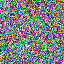

In [9]:
# 将随机的一段数字转为图片显示出来
from torchvision import transforms
from torchvision.utils import save_image
from PIL import Image
import torch
to_pil = transforms.ToPILImage()
img = to_pil(torch.randn(3, 64, 64))
img


In [13]:
import numpy as np
img_array = np.array(img)
img_array.shape

# save_image(img, 'a.png')
# Image.open('a.png')

(64, 64, 3)

# TensorBoard的使用

In [14]:
from tensorboard_logger import Logger

# 构建logger对象, logdir用来指定log文件的保存路径
# flush_secs 用来指定刷新同步时间间隔
logger = Logger(logdir='experimient_cnn', flush_secs=2)
for ii in range(100):
    logger.log_value('loss', 10-ii**0.5, step=ii)
    logger.log_value('accuracy', ii**0.5 / 10)

/home/shawroad/anaconda3/envs/torch_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/shawroad/anaconda3/envs/torch_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/shawroad/anaconda3/envs/torch_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/shawroad/anaconda3/envs/t

# GPU加速

In [15]:
import torch
tensor = torch.Tensor(3, 4)

# 返回一个新的tensor, 保存到第一块GPU上, 但原来的tensor并没有改变
tensor.cuda(0)

tensor.is_cuda   # False

AssertionError: 
Found no NVIDIA driver on your system. Please check that you
have an NVIDIA GPU and installed a driver from
http://www.nvidia.com/Download/index.aspx

In [16]:
# 不指定所使用的GPU设备, 将默认使用第一块GPU
tensor = tensor.cuda()
tensor.is_cuda

AssertionError: 
Found no NVIDIA driver on your system. Please check that you
have an NVIDIA GPU and installed a driver from
http://www.nvidia.com/Download/index.aspx

In [18]:
# 将模型放到GPU上
from torch import nn

model = nn.Linear(3, 4)
model.cuda(device_id=1)
model.weight.is_cuda

TypeError: cuda() got an unexpected keyword argument 'device_id'

In [20]:
from torchvision.models import AlexNet
import torch
torch.set_default_tensor_type('torch.FloatTensor')
model = AlexNet()

# Module的state_dict是一个字典
# model.state_dict().keys()
model.state_dict().values()

odict_values([tensor([[[[-3.9828e-02, -7.1348e-04,  1.7686e-02,  ...,  1.7807e-02,
            5.0652e-02, -4.0001e-02],
          [ 9.2015e-03, -3.0729e-02,  2.2695e-02,  ..., -1.6682e-03,
            1.1961e-02,  3.7615e-02],
          [ 2.4543e-02,  2.6413e-02, -2.2688e-02,  ..., -1.6151e-02,
            2.7507e-02,  1.6446e-02],
          ...,
          [-1.5080e-02, -1.3464e-02,  2.3954e-02,  ..., -2.9856e-02,
            3.4874e-03, -4.7072e-02],
          [ 1.6672e-02, -1.2805e-02,  8.9484e-03,  ...,  3.7028e-02,
           -5.0129e-03,  6.9439e-03],
          [ 1.1857e-02, -1.1995e-02,  3.2097e-02,  ...,  6.6266e-03,
           -4.9535e-02,  1.9876e-02]],

         [[ 3.8819e-02,  1.1057e-02, -3.6437e-02,  ...,  1.1844e-02,
            1.8758e-02,  4.9272e-02],
          [-4.2309e-02,  2.8668e-02,  4.7134e-02,  ...,  1.5316e-02,
           -3.5286e-02, -4.1165e-02],
          [ 1.8111e-02, -3.2232e-02,  2.1438e-02,  ..., -1.5271e-03,
           -4.6699e-02,  2.9381e-02],
      

In [21]:
# 将Module对象保存与加载
torch.save(model.state_dict(), 'alexnet.pth')
model.load_state_dict(torch.load('alexnet.pth'))

In [22]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

torch.save(optimizer.state_dict(), 'optimizer.pth')

optimizer.load_state_dict(torch.load('optimizer.pth'))

In [23]:
all_data = dict(
    optimizer = optimizer.state_dict(),
    model = model.state_dict(),
    info = '模型和优化器的所有参数'
)
torch.save(all_data, 'all.pth')

In [24]:
all_data = torch.load('all.pth')
all_data.keys()

dict_keys(['optimizer', 'model', 'info'])